# Tasks

## 1. Collatz Conjecture

##### Task description:
> The Collatz conjecture1 is a famous unsolved problem in mathematics. The problem is to prove that if you start with any positive
integer x and repeatedly apply the function f(x) below, you always get stuck in the repeating sequence 1, 4, 2, 1, 4, 2, . . .
$$ f(x) =
\begin{cases}
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{otherwise}
\end{cases} $$

The task is to verify, using Python, that the conjecture is true for the first 10,000 positive integers.

###### - 1 The Simple Math Problem We Still Can’t Solve | Quanta Magazine. Sept. 22, 2020. url: https://www.quantamagazine.org/why-mathematicians-stillcant-solve-the-collatz-conjecture-20200922/(visitedon08/18/2023)

    ***



### Notes from lecture:

In [1]:
x=5

In [2]:
def f_collatz(x):
    #if x is even, devide with 2
    if x %2 == 0:
        return x // 2
    else:
        return (3 * x) +1


In [3]:
def loop_collatz(x):
    while x!=1:
        # print(x, end=', ')
        x=f_collatz(x) 
    return x

In [4]:
number=3
print(f"\nTesting Collatz with initial value of: {number}-> \n\t{loop_collatz(number)}")


Testing Collatz with initial value of: 3-> 
	1


#### 1.1: Task planning

The Collatz formula:
$$ f(x) =
\begin{cases}
    x \div 2 & \text{if } x \text{ is even} \\
    3x + 1 & \text{otherwise}
\end{cases} $$
##### *This process will eventually reach the number 1, regardless of which positive integer is chosen initially. (https://en.wikipedia.org/wiki/Collatz_conjecture)*

In order to verify that the above is true for the first 10,000 positive integers, the program will generate and analyse a dataframe that consists of the 
-   sequence of the first 10,000 positive integers
-   resulting Collatz values for each integer (this is not a necessary step, only to demonstrate Collatz is being calculated for each integer)
-   the final value of the Collatz sequence which is expected to be 1 for each integer
-   the last 3 items of each Collatz sequence to verify the predicted 4, 2, 1 cycle as demonstrated in the lecture
The populated DataFrame then can be analysed with Panda's .describe() function to verify if the max values for the "Final Value" datapoint is indeed equals to 1, which would prove that running the Collatz calculation on the first 10,000 positive integers will always return 1.
##### As a starting point, functions "f_collatz()" and "loop_collatz()" are being repurposed from the lecture notes.
-   f_collatz() encapsulates the singular Collatz calculation (x/2 if x is even or 3x+1 if x is an odd one)
-   loop_collatz() calls f_collatz and repeats it until x returns 1

*To demonstrate that the Collatz calculation was actually carried out, the program will store Collatz values from each calculation in a list object*


In [5]:
# function to store Collatz sequence to demonstrate calculation has carried out
def store_collatz(x):
    store=[] # create emty list conatiner
    while x!=1:
        x=f_collatz(x) # call Collatz function as per lecture notes
        store.append(x) # store each iteration
    return store #return container list
# --- end of function
print(store_collatz(6)) #check resulting list

[3, 10, 5, 16, 8, 4, 2, 1]


*Using a dictionary object the program will store the values in a labelled structure; "Number" to store each x integer, "Collatz Values" for each group of Collatz values and "Final Value" for the final Collatz value for each integer. Added last three Values to check the predicted 4, 2, 1 cycle as demonstrated in the lecture*

In [6]:
# testing dictionary solution
i=1 #iterator and initial positive integer for the Collatz calculation
collstored=[] # container for Collatz Values
collData=[] # container for dictionary items
while i!=8: # loop until reaching 8 for testing purposes
    collstored=store_collatz(i) # calling previously created function to populate list of Collatz Values
    collDict={ #create labelled structure in Dictionary and populate
        "Number":i, #starting number or x for each iteration
        "Collatz Values":collstored, # list item for each list of Collatz values per iteration
        "Final Value":loop_collatz(i), # calling function as per lecture notes that loops through the Collatz calculations until reaching 1 to store as final value 
                                    #(if the last value wasn't 1 at any of the positive integers, there would be an infinite loop and we won't have the result verifying the Collatz conjencture)
        "First of the Last Three Values": collstored[-3:][0:1], # checking last 3 items being 4,2,1 as predicted by the Collatz conjecture
        "Mid of the Last Three Values":collstored[-3:][1:2], # checking last 3 items being 4,2,1 as predicted by the Collatz conjecture
        "Last of the Last Three Values":collstored[-3:][2:3] # checking last 3 items being 4,2,1 as predicted by the Collatz conjecture
        }
    collData.append(collDict) # conatiner for each iterated dictionary item
    i=i+1 #iterator increased
print(collData) #print list with all dictionary items generated


[{'Number': 1, 'Collatz Values': [], 'Final Value': 1, 'First of the Last Three Values': [], 'Mid of the Last Three Values': [], 'Last of the Last Three Values': []}, {'Number': 2, 'Collatz Values': [1], 'Final Value': 1, 'First of the Last Three Values': [1], 'Mid of the Last Three Values': [], 'Last of the Last Three Values': []}, {'Number': 3, 'Collatz Values': [10, 5, 16, 8, 4, 2, 1], 'Final Value': 1, 'First of the Last Three Values': [4], 'Mid of the Last Three Values': [2], 'Last of the Last Three Values': [1]}, {'Number': 4, 'Collatz Values': [2, 1], 'Final Value': 1, 'First of the Last Three Values': [2], 'Mid of the Last Three Values': [1], 'Last of the Last Three Values': []}, {'Number': 5, 'Collatz Values': [16, 8, 4, 2, 1], 'Final Value': 1, 'First of the Last Three Values': [4], 'Mid of the Last Three Values': [2], 'Last of the Last Three Values': [1]}, {'Number': 6, 'Collatz Values': [3, 10, 5, 16, 8, 4, 2, 1], 'Final Value': 1, 'First of the Last Three Values': [4], 'Mi

*as the resulting dictionary has the necessary structure (labelled data) for creating a dataframe, the program will import pandas and generate a datarame from the data in the dictionary.*

In [7]:
import pandas as pd
df=pd.DataFrame(collData) #converting dictionary data into a dataframe
df.head(15) #check result

,Number,Collatz Values,Final Value,First of the Last Three Values,Mid of the Last Three Values,Last of the Last Three Values
0,1,[],1,[],[],[]
1,2,[1],1,[1],[],[]
2,3,"[10, 5, 16, 8, 4, 2, 1]",1,[4],[2],[1]
3,4,"[2, 1]",1,[2],[1],[]
4,5,"[16, 8, 4, 2, 1]",1,[4],[2],[1]
5,6,"[3, 10, 5, 16, 8, 4, 2, 1]",1,[4],[2],[1]
6,7,"[22, 11, 34, 17, 52, 26, 13, 40, 20, 10, 5, 16...",1,[4],[2],[1]


*The resulting dataframe now can be analysed with Panda's .describe() function to find max value for final values*

In [8]:
df.describe()

,Number,Final Value
count,7.000000,7.0
mean,4.000000,1.0
std,2.160247,0.0
min,1.000000,1.0
25%,2.500000,1.0
50%,4.000000,1.0
75%,5.500000,1.0
max,7.000000,1.0


##### *.describe() returned the expected max value and min value (1.0) for the "Final Value" column in the test dataframe*
> *note: (.describe() can only analyse numbers therefore it disregarded list data stored in "Collatz Values" and "Last Three Items")*

With the individual steps tested and returning the expected results, these will be merged into one function "CollatzVerify()", so it can be called with any positive integer

In [9]:
def CollatzVerify(maxNum):
    import pandas as pd #pandas module imported
    i=1 #iterator and starting number for Collatz
    collstored=[] # container for stored Collatz seqence for each integer
    collData=[] # dictionary container for labeled data
    
    #populating dictionary object with each iteration using while loop
    while i!=maxNum+1: # maxNum will determine the scope of the calculation as per function parameter (+1 to compensate for python's counting starting with 0) 
        collstored=store_collatz(i) #call function to store Collatz sequence for each iteration
        collDict={ #populate dictionary object
        "Number":i, #i=each number in the iterator
        "Collatz Values":collstored, #seqence calculated by store_collatz()
        "Final Value":loop_collatz(i), # end of collatz sequence (I couldn't store the sliced list data as integer hence the calculation)
        "Last Three Values":collstored[-3:], # slicing out last 3 items from Collatz values (4,2,1 was predicted)
        }
        collData.append(collDict) #adding all above to existing dictionary data
        i=i+1 #increase iteration by 1
    #end of while loop
    df=pd.DataFrame(collData) #after the while-loop is finished the resulting dictionary object is converted to a dataframe with pandas.
    print(f"Verifying that last item of the Collatz sequence for the first {maxNum} positive integers is 1.0\n") #user interaction - function description with scope indicated
    print(f"DataFrame Analysis:\n{df.describe()}") # display results of dataframe analysis with describe()
    print("\nDataframe structure sample:")
    return(df) #show sample of the dataframe (this will show first and last 5 rows)
#___End of combined function___

Calling the merged function CollatzVerify() with 10,000

In [10]:
CollatzVerify(10000)

Verifying that last item of the Collatz sequence for the first 10000 positive integers is 1.0

DataFrame Analysis:
            Number  Final Value
count  10000.00000      10000.0
mean    5000.50000          1.0
std     2886.89568          0.0
min        1.00000          1.0
25%     2500.75000          1.0
50%     5000.50000          1.0
75%     7500.25000          1.0
max    10000.00000          1.0

Dataframe structure sample:


,Number,Collatz Values,Final Value,Last Three Values
0,1,[],1,[]
1,2,[1],1,[1]
2,3,"[10, 5, 16, 8, 4, 2, 1]",1,"[4, 2, 1]"
3,4,"[2, 1]",1,"[2, 1]"
4,5,"[16, 8, 4, 2, 1]",1,"[4, 2, 1]"
...,...,...,...,...
9995,9996,"[4998, 2499, 7498, 3749, 11248, 5624, 2812, 14...",1,"[4, 2, 1]"
9996,9997,"[29992, 14996, 7498, 3749, 11248, 5624, 2812, ...",1,"[4, 2, 1]"
9997,9998,"[4999, 14998, 7499, 22498, 11249, 33748, 16874...",1,"[4, 2, 1]"
9998,9999,"[29998, 14999, 44998, 22499, 67498, 33749, 101...",1,"[4, 2, 1]"


Running .describe() on the resulting dataframe after calling CollatzVerify() function with 10000, returns the expected result. 

- 'count' verifies that the dataframe has 10000 'Number' items and 10000 'Final value' items therefore the Collatz function was carried out 10000 times
- The 'min' value for 'Number' is 1.0, the 'max' is 10000.0 which confirms the range is indeed the first 10000 positive integers 
- 'min' and 'max' values for 'Final Value' are both 1.0 which means all 10000 Collatz sequences ended with 1.

Above considered, the Collatz conjecture is verified for the first 10000 positive integers.

As .describe() doesn't deal with python list objects, a sample of the dataframe is included to prove all elements are present including Collatz Values and Last Three Values.

> Note: Perhaps a simpler method could have been to encapsulate the loop_collatz() function in another loop that runs 10,000 times and increases the parameter by 1 when loop_collatz() gets to 1. In this case if there is no infinite loop error the Collatz conjecture must be true. However, there would be no 'evidence' after the 10,000 loops finished.

#### End of Task1. - Collatz Conjecture
___
***


## Task 2 - Penguin data set

##### Task description:
Give an overview of the famous penguins data set, explaining the types of variables it contains. Suggest the types of variables
that should be used to model them in Python, explaining your
rationale.



### 2.1 Overview: The Palmer Penguins Dataset 

The Palmer Penguins Dataset is a commonly used alternative and very similar to the famous Iris dataset for learning data exploration and visualization.
The data was gathered and published by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a Long Term Ecological Research Network member. 
It is a dataset comprising various measurements for 344 penguins of three different penguin species, collected from 3 islands in the Palmer Archipelago, Antarctica. 
###### (F. Spire, Palmer Penguins - Data Preprocessing and Analysis, 2021, https://www.kaggle.com/code/florianspire/palmer-penguins-data-preprocessing-and-analysis (visited 08/10/23))<br>(S. K. Dash, Data Exploration and Visualisation Using Palmer Penguins Dataset, 2022, https://www.analyticsvidhya.com/blog/2022/04/data-exploration-and-visualisation-using-palmer-penguins-dataset/ (visited 08/10/23))


#### 2.2 Obtaining the data
> The task description provided a link to the dataset on Github. By visual overview it has data organized in 7 columns and 345 rows. Some data is missing.
<br> 

The dataset is imported directly from the github location then converted to dataframe. 
+ After conversion, the resulting dataframe is exported as .csv to the local folder. 
+ A sample of the dataframe is generated to verify the resulting structure is matching the source on github.
+ Running pandas .dtypes command to verify data types for each column

###### mwaskom/seaborn-data: Data repository, for seaborn examples. Aug. 30, 2023. url: https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv (visited on 9/10/2023).

In [11]:
#importing penguins dataset from github link in task description
import pandas as pd
url = 'https://github.com/mwaskom/seaborn-data/blob/master/penguins.csv?raw=true' # had to add ?raw=true to the end to make it work (source: https://stackoverflow.com/questions/55240330/how-to-read-csv-file-from-github-using-pandas)
df = pd.read_csv(url)
df.to_csv("penguines.csv", index=False) # save downloaded dataframe in local folder as csv
print(f'sample:\n{df.head(3)}') # check resulting dataframe
print(f'\ndata types:\n{df.dtypes}') # check datatypes in the dataframe (source: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html)

sample:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  

data types:
species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object


#### 2.2.1 Verification and quick overview of imported data

+ The resulting dataframe structure and the first 3 raws of data matches the source on Github.
+ .dtypes command returns **'object'** for the text and **'float64'** for numerical data:
  * data types for each variables:
    - island: object
    - bill_length_mm: float64
    - bill_depth_mm: float64
    - flipper_length_mm: float64
    - body_mass_g: float64
    - sex: object

**'object'** is the pandas equivalent to python's 'string' datatype. It is the most general datatype and can contain both numbers (as characters) and strings <br>
**'float64'** is a pandas datatype for numberic characters and it is automatically assigned to columns that contain numeric characters with decimal point and/or NaN values

###### pandas.DataFrame.dtypes (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html) <br> Data Analysis and Visualization in Python for Ecologists, Data Types and Formats (https://datacarpentry.org/python-ecology-lesson/04-data-types-and-format.html)



#### 2.3.1 Explaining the types of variables it contains

The Penguin dataset contains 7 variables
 1. *species* - Categorical (Nominal)
   - Data in the first column describes what species is the sample from. It is Qualitative, Nominal type, containing textual, descriptive information that cannot be measured but can be used to cathegorise or establish group affiliation.
 2. *island* - Categorical (Nominal)
   - Data describes where the sample is from. It is also Qualitative, Nominal type, containing textual, descriptive information.
 3. *bill_length_mm* - Continuous (Ratio)
 4. *bill_depth_mm* - Continuous (Ratio)
 5. *flipper_length_mm* - Continuous (Ratio)
 6. *body_mass_g* - Continuous (Ratio)
   - variables above (2., 3., 4. and 5.) contain biometric data for the penguins. The data is Quantitative containing numerical information that can be measured. It is also Continuous type for the data can be represented as real numbers. Furthermore, the data is a Ratio type. Although there are equal intervals between consecutive values similarly to Interval type data, these measurements can't have negative values, there is a true zero point therefore these are Ratio type data.
 7. *sex* - Categorical (Dichotomous)
   - This column contains Dichotomous data, a special form of the Nominal type. It is descriptive and non-numerical, but it can only take one of two mutually exclusive values (Male or Female in this case).

###### Types of data & the scales of measurement, UNSW, Sydney 2020 (https://studyonline.unsw.edu.au/blog/types-of-data#:~:text=Properties%20and%20scales%20of%20measurement,to%20properly%20analyse%20the%20data)<br>Types of Data in Statistics (https://www.freecodecamp.org/news/types-of-data-in-statistics-nominal-ordinal-interval-and-ratio-data-types-explained-with-examples/)

#### 2.3.1 Suggesting the types of variables that should be used to model the data in Python.

 1. *species*
 2. *island*
   - the Nominal textual data in the first two columns can be stored in a string variable in python. String (str) variables store text data.
 3. *bill_length_mm*
 4. *bill_depth_mm*
 5. *flipper_length_mm*
 6. *body_mass_g*
   - above are Continuous type Numerical data, meaning they can be any real number. Python offers 3 types of variables to store numerical data Integer (int), Floating Point (float) and Complex (complex). Since pythons Integer type variable only stores whole numbers and complex is designed to store complex numbers we must use floating point (float) type variable to store the data from these columns.
 7. *sex* - Nominal, dicothomous
   - the data in this column is textual but can only take 2 mutually exclusive values (Male or Female) so it might be tempting to use a boolean type variable to store the data, however python's Boolean (bool) variable can only be True or False so in this case a String (str) type variable is the right choice.

###### Python Data Types (https://www.programiz.com/python-programming/variables-datatypes)

#### End of Task 2. - Penguins Dataset
___
***

## Task 3. Modelling penguins dataset variables with numpy's random distribution

#### 3.1 Obtaining data

As the data was already loaded into a dataframe 'df' in section 2.2 there is only a quick check that the data is available and the structure is intact.

In [17]:
print(df.head()) # check strutcture

  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In section 2.3.1 the variable types in the penguin dataset were assigned to Categorical and Continuous datatypes. 

1. *Categorical:* Species, Island, Sex
2. *Continuous:* Biometric data; bill length, depth, flipper length and body mass.

TypeError: 'value' must be an instance of str or bytes, not a float

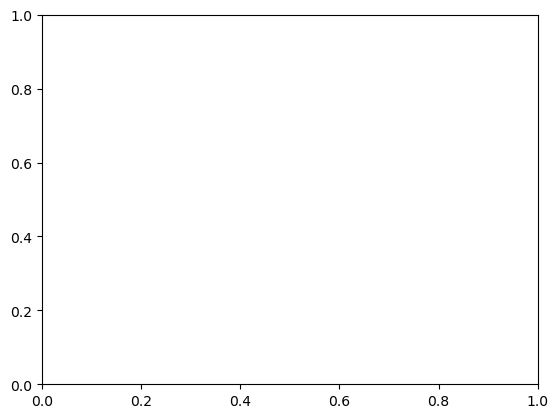

In [63]:
import matplotlib.pyplot as plt
plt.hist(df['sex'])

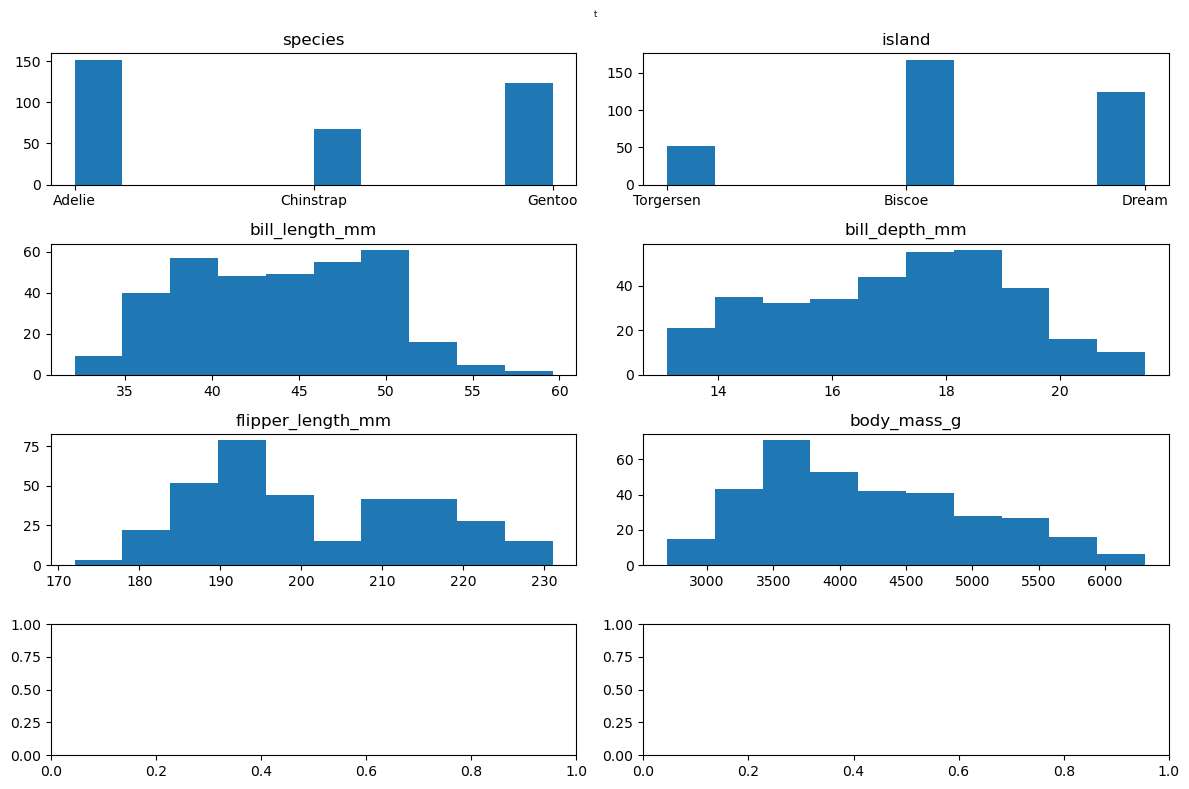

In [57]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(4,2, figsize=(12,8))
fig.suptitle('t',fontsize=6)
ax[0,0].hist(df['species'])
ax[0,0].set_title('species')
ax[0,1].hist(df['island'])
ax[0,1].set_title('island')
ax[1,0].hist(df['bill_length_mm'])
ax[1,0].set_title('bill_length_mm')
ax[1,1].hist(df['bill_depth_mm'])
ax[1,1].set_title('bill_depth_mm')
ax[2,0].hist(df['flipper_length_mm'])
ax[2,0].set_title('flipper_length_mm')
ax[2,1].hist(df['body_mass_g'])
ax[2,1].set_title('body_mass_g')
#ax[3,0].hist(df['sex'])
#ax[3,0].set_title('sex')


plt.tight_layout()
